In [2]:
# 3. Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set.
# Print both correct and wrong predictions. Python ML library classes can be used for this
# problem.

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# 1. Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Train/test split (80/20), stratified to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature scaling for distance‑based model
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4. Hyperparameter tuning: find best k in [1…30]
param_grid = {'n_neighbors': list(range(1, 31))}
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)
best_k = grid.best_params_['n_neighbors']
print(f"Best k found via CV: {best_k}")

# 5. Train final kNN classifier
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# 6. Predictions & evaluation
y_pred = knn.predict(X_test_scaled)

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Print correct vs wrong predictions
correct_idx = [i for i in range(len(y_test)) if y_test[i] == y_pred[i]]
wrong_idx   = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]

print(f"\nCorrect predictions ({len(correct_idx)}):")
for i in correct_idx:
    print(f"  Sample {i}: True = {iris.target_names[y_test[i]]}, Pred = {iris.target_names[y_pred[i]]}")

print(f"\nWrong predictions ({len(wrong_idx)}):")
for i in wrong_idx:
    print(f"  Sample {i}: True = {iris.target_names[y_test[i]]}, Pred = {iris.target_names[y_pred[i]]}")



Best k found via CV: 5

Test Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Correct predictions (28):
  Sample 0: True = setosa, Pred = setosa
  Sample 1: True = virginica, Pred = virginica
  Sample 2: True = versicolor, Pred = versicolor
  Sample 3: True = versicolor, Pred = versicolor
  Sample 4: True = setosa, Pred = setosa
  Sample 5: True = versicolor, Pred = versicolor
  Sample 6: True = setosa, Pred = setosa
  Sample 7: True = setosa, Pred = setosa
  Sample 8: True = virginica, Pred = virginica
  Sample 9: True = versicolor, Pred = versicolor
  Sample 10: 

Best k found via CV: 5

Test Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



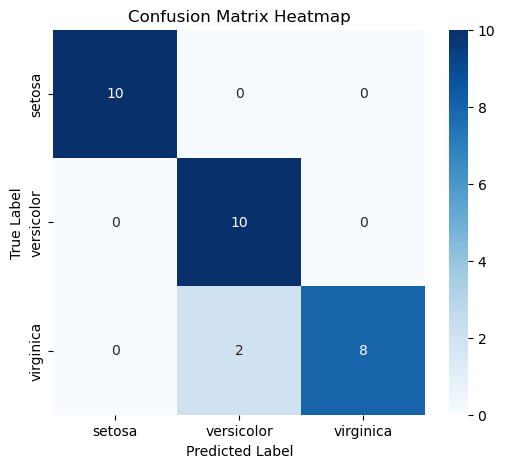

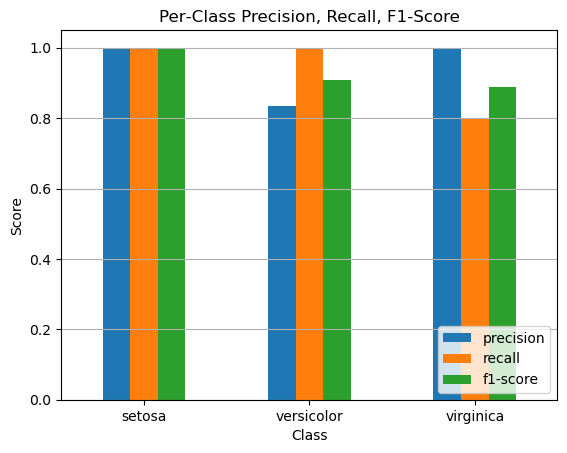


Correct predictions (28):
  Sample 0: True = setosa, Pred = setosa
  Sample 1: True = virginica, Pred = virginica
  Sample 2: True = versicolor, Pred = versicolor
  Sample 3: True = versicolor, Pred = versicolor
  Sample 4: True = setosa, Pred = setosa
  Sample 5: True = versicolor, Pred = versicolor
  Sample 6: True = setosa, Pred = setosa
  Sample 7: True = setosa, Pred = setosa
  Sample 8: True = virginica, Pred = virginica
  Sample 9: True = versicolor, Pred = versicolor
  Sample 10: True = virginica, Pred = virginica
  Sample 11: True = virginica, Pred = virginica
  Sample 12: True = virginica, Pred = virginica
  Sample 13: True = versicolor, Pred = versicolor
  Sample 14: True = setosa, Pred = setosa
  Sample 15: True = setosa, Pred = setosa
  Sample 16: True = setosa, Pred = setosa
  Sample 17: True = versicolor, Pred = versicolor
  Sample 18: True = versicolor, Pred = versicolor
  Sample 20: True = setosa, Pred = setosa
  Sample 21: True = virginica, Pred = virginica
  Sample 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# 1. Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split into train/test (80/20), stratified to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale features for distance‑based model
scaler = StandardScaler().fit(X_train)      # ensure zero mean, unit variance :contentReference[oaicite:6]{index=6}
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4. Hyperparameter tuning: find best k in [1…30]
param_grid = {'n_neighbors': list(range(1, 31))}
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)
best_k = grid.best_params_['n_neighbors']
print(f"Best k found via CV: {best_k}")  # :contentReference[oaicite:7]{index=7}

# 5. Train final kNN classifier
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# 6. Predictions & evaluation
y_pred = knn.predict(X_test_scaled)
acc    = accuracy_score(y_test, y_pred)     # overall accuracy :contentReference[oaicite:8]{index=8}
print(f"\nTest Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))  
# precision/recall/F1 per class :contentReference[oaicite:9]{index=9}

# 7. Confusion Matrix & Heatmap
cm = confusion_matrix(y_test, y_pred)       # raw confusion counts :contentReference[oaicite:10]{index=10}
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()                                 # visualize confusion patterns :contentReference[oaicite:11]{index=11}

# 8. Bar Chart of Precision / Recall / F1‑Score
report_dict = classification_report(
    y_test, y_pred, target_names=iris.target_names, output_dict=True
)
metrics_df = pd.DataFrame(report_dict).T.iloc[:-3, :3]  # drop accuracy/avg rows
metrics_df.plot.bar(rot=0)
plt.title('Per‑Class Precision, Recall, F1‑Score')
plt.ylim(0, 1.05)
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()                                 # clear view of per‑class performance :contentReference[oaicite:12]{index=12}

# 9. Print Correct vs Wrong Predictions
correct_idx = [i for i in range(len(y_test)) if y_test[i] == y_pred[i]]
wrong_idx   = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]

print(f"\nCorrect predictions ({len(correct_idx)}):")
for i in correct_idx:
    print(f"  Sample {i}: True = {iris.target_names[y_test[i]]}, Pred = {iris.target_names[y_pred[i]]}")

print(f"\nWrong predictions ({len(wrong_idx)}):")
for i in wrong_idx:
    print(f"  Sample {i}: True = {iris.target_names[y_test[i]]}, Pred = {iris.target_names[y_pred[i]]}")

